# Convergence plots

In [7]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
V = [ 0.65826859 -0.21697946 -0.22061783 -0.2206713  -0.22

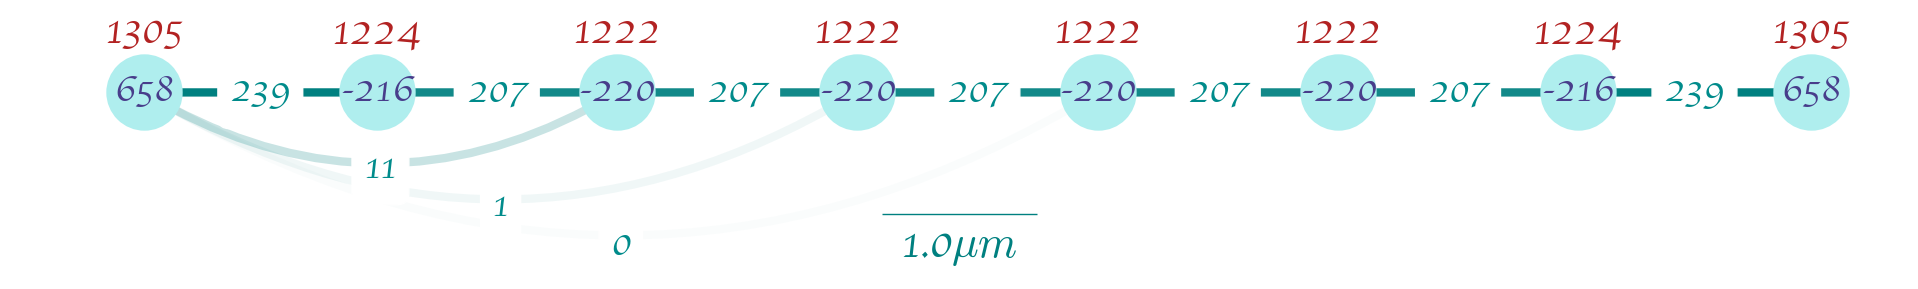

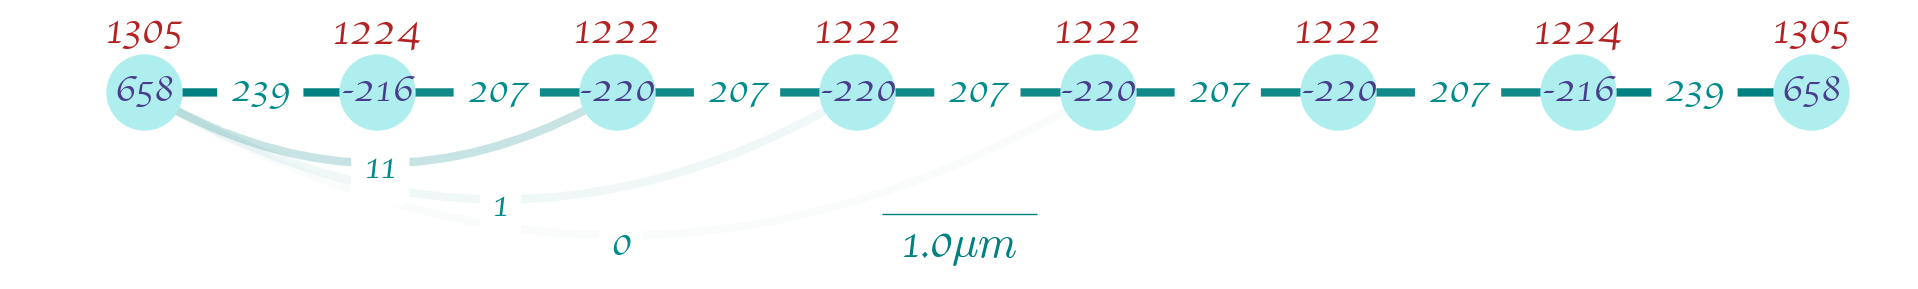

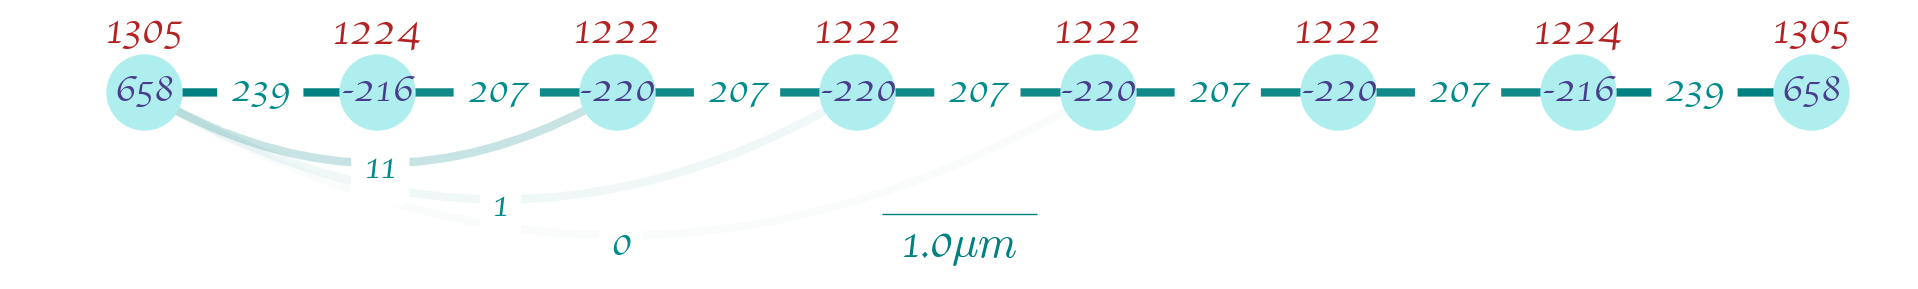

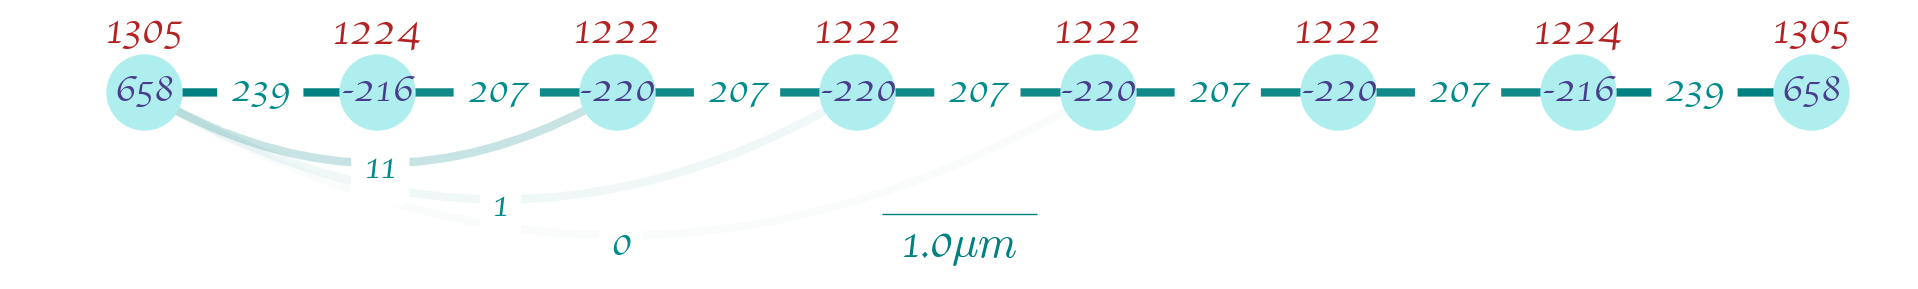

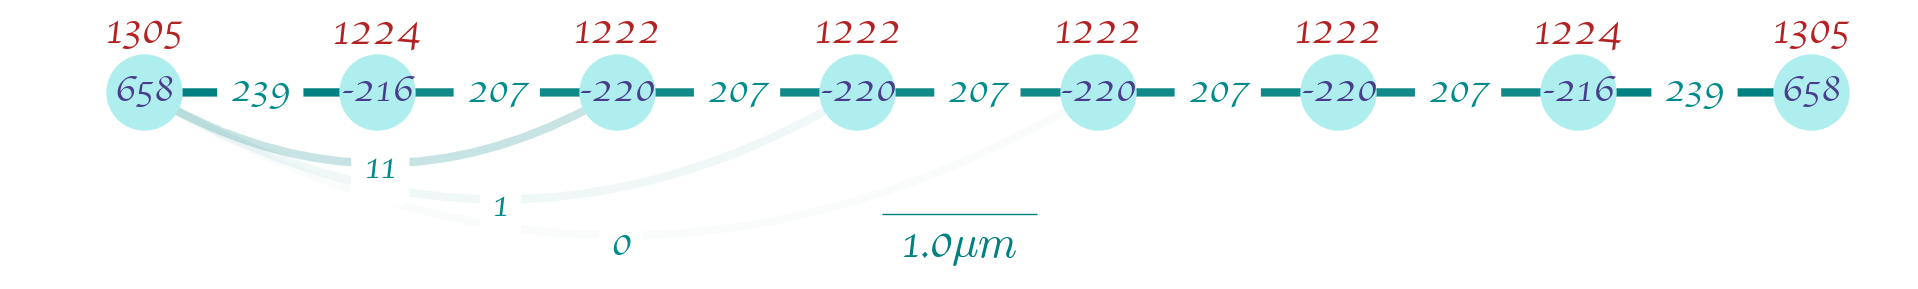

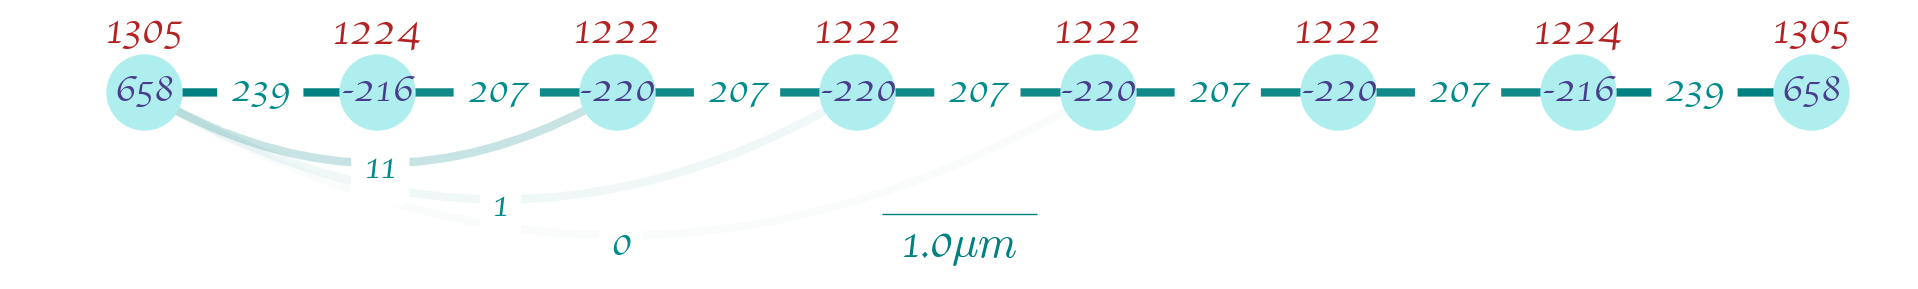

In [12]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *


L = 8
Ly = 1
d = 3
shape = "square"
w = None
eqt = ""
R0 = np.array([3, 3, 7.2])
A_list = []
U_list = []
for N in range(12, 24, 2):
    G = HubbardGraph(
        N,
        R0=R0,
        lattice=np.array([L, Ly], dtype=int),
        trap=(52.26, 1000),
        lc=(1550, 1600),
        ascatt=1770,
        laser=780,
        band=1,
        dim=d,
        sparse=True,
        shape=shape,
        equalize=False,
        verbosity=0,
    )

    fn = f"../output/convergence/{d}D_{L}x1_{shape}_{w}_N_{N}.ini"
    report = rep.get_report(fn)
    G = read_file(report, G)
    G.draw_graph(nnn=True, A=G.A, U=G.U)
    A_list.append(G.A)
    U_list.append(G.U)
print(f"V = {np.diag(G.A)}")
t = abs(G.nn_tunneling(G.A))
print(f"t = {t}")
print(f"U = {G.U}")
print(f"V_err = {G.v_cost_func(G.A, None)}")
print(f"t_err = {G.t_cost_func(G.A, None, None, None)}")
print(f"U_err = {G.u_cost_func(G.U, None)}")


dx = [0.13636364 0.15       0.16666667 0.1875     0.21428571 0.25      ]
max_err A = 0.0002189707318348247, max_err U = 0.00042922904356253774 max_err = 0.00042922904356253774
max_err A = 4.692465564423242e-06, max_err U = 2.3655088390810533e-05 max_err = 2.3655088390810533e-05
max_err A = 1.1283363380147906e-07, max_err U = 1.0506076031383017e-06 max_err = 1.0506076031383017e-06
max_err A = 2.7418996985038446e-09, max_err U = 3.760998372329269e-08 max_err = 3.760998372329269e-08
max_err A = 3.855658151412787e-11, max_err U = 1.190678053535521e-09 max_err = 1.190678053535521e-09
max_err A = 0.0, max_err U = 0.0 max_err = 0.0


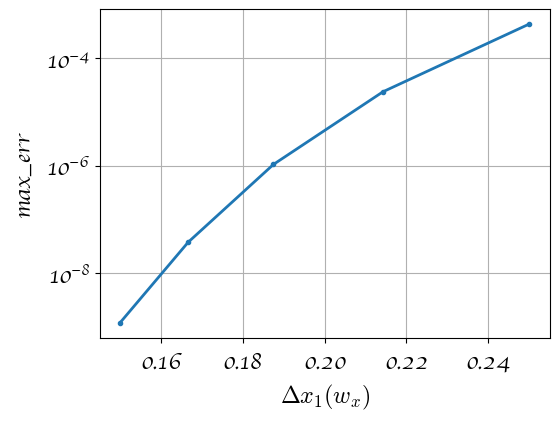

In [14]:
import matplotlib.pyplot as plt

params = {
    "figure.figsize": (6, 4.5),
    "legend.fontsize": "xx-large",
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
}
plt.rcParams.update(params)
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

dx = 3 / np.arange(12, 24, 2)[::-1]
print("dx =", dx)
max_err = np.zeros_like(dx)
for i in range(len(max_err)):
    mea = np.max(abs(A_list[i] - A_list[-1])) / abs(A_list[-1].max())
    meu = np.max(abs(U_list[i] - U_list[-1])) / abs(U_list[-1].max())
    me = max(mea, meu)
    print(f"max_err A = {mea}, max_err U = {meu} max_err = {me}")
    max_err[i] = me
plt.plot(dx[1:], max_err[:-1][::-1], ".-", lw=2)
plt.xlabel("$\Delta x_1(w_x)$")
plt.ylabel("max_err")
plt.yscale("log")
plt.grid()
plt.savefig("AppFig1.pdf")


Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
V = [ 0.65826859 -0.21697946 -0.22061783 -0.2206713  -0.22

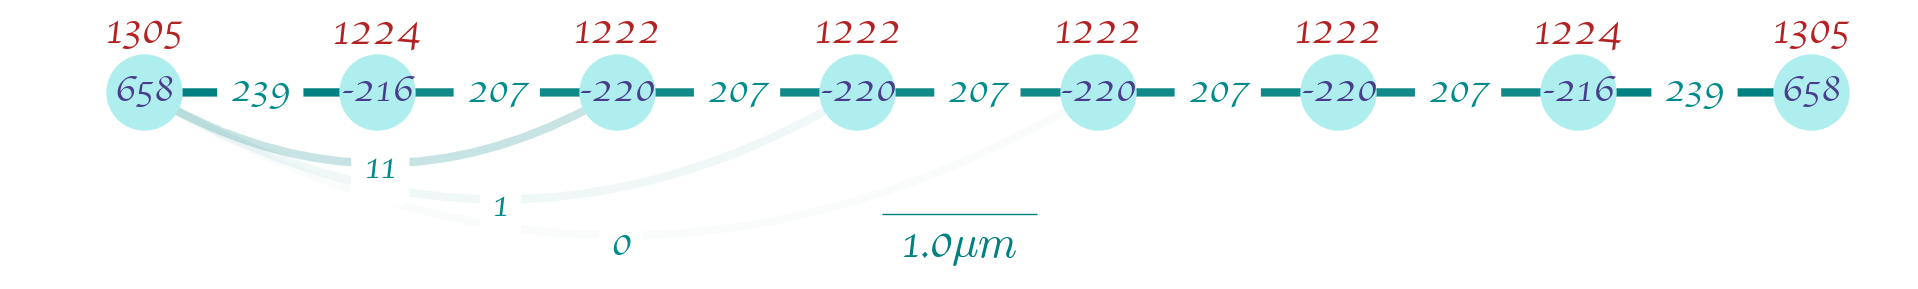

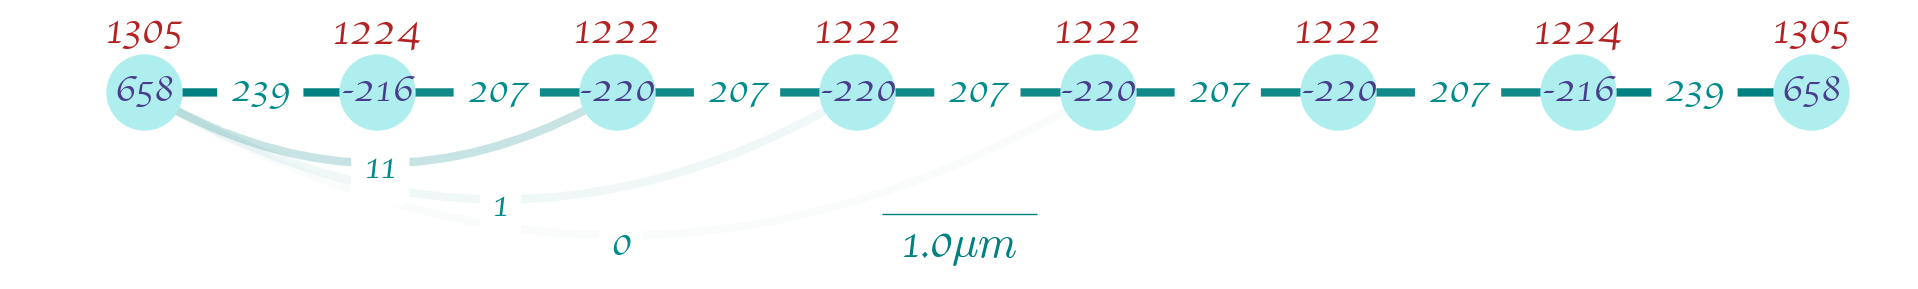

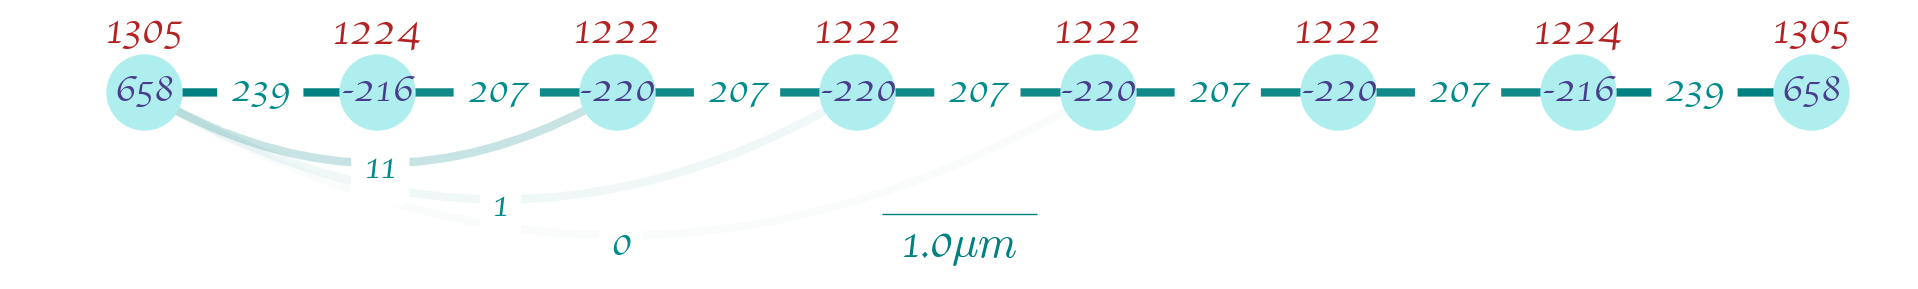

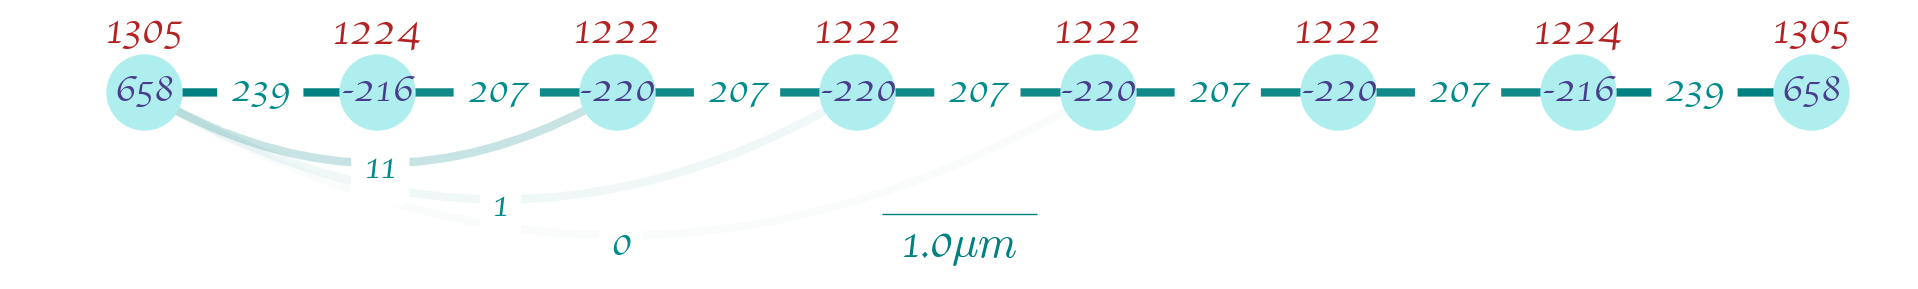

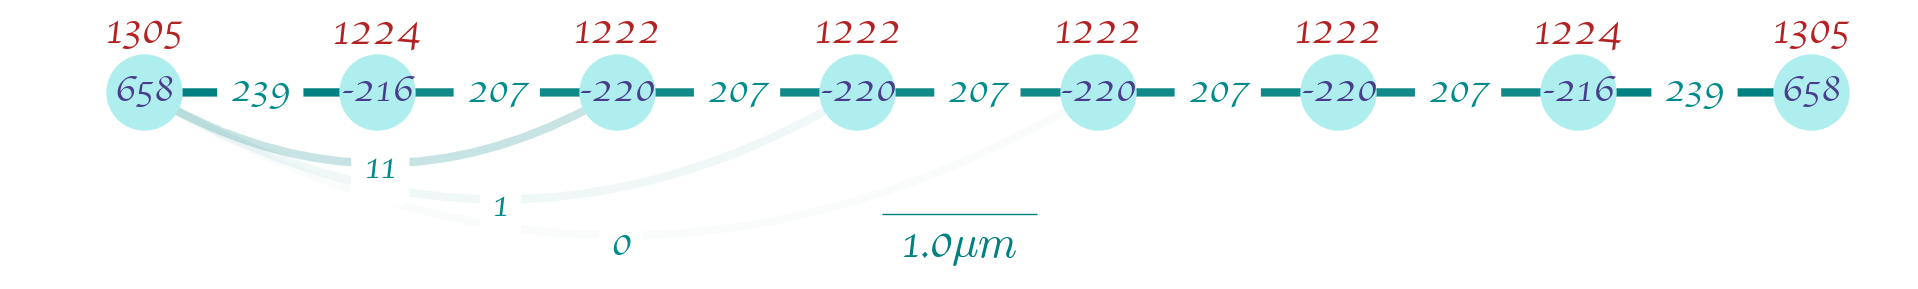

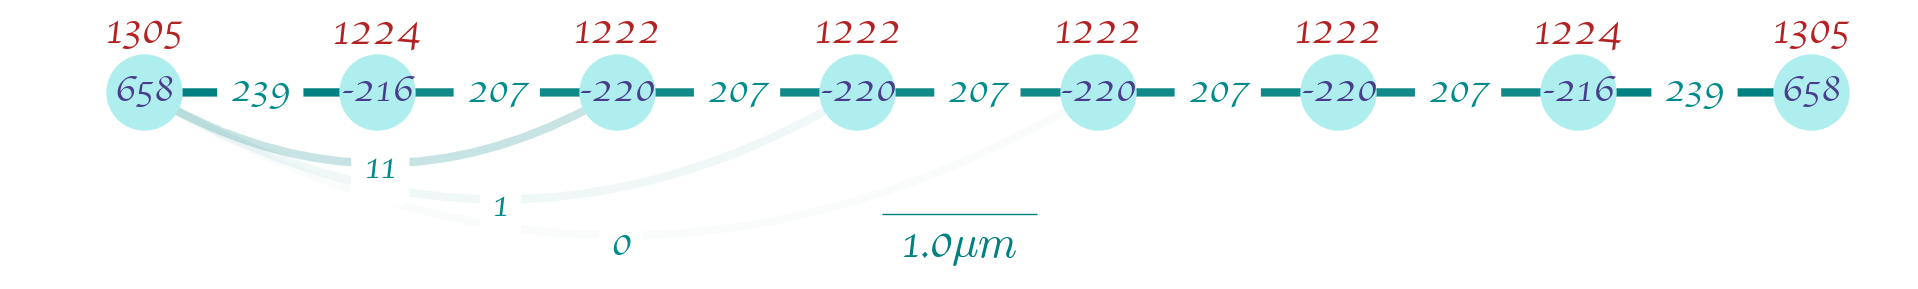

In [10]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

L = 8
Ly = 1
d = 3
shape = "square"
w = None
eqt = ""
A_list = []
U_list = []
for N in range(12, 24, 2):
    R0 = np.array([1, 1, 2.4]) * N * 3 / 20
    G = HubbardGraph(
        N,
        R0=R0,
        lattice=np.array([L, Ly], dtype=int),
        trap=(52.26, 1000),
        lc=(1550, 1600),
        ascatt=1770,
        laser=780,
        band=1,
        dim=d,
        sparse=True,
        shape=shape,
        equalize=False,
        verbosity=0,
    )

    fn = f"../output/convergence/{d}D_{L}x1_{shape}_{w}_L_{N}.ini"
    report = rep.get_report(fn)
    G = read_file(report, G)
    G.draw_graph(nnn=True, A=G.A, U=G.U)
    A_list.append(G.A)
    U_list.append(G.U)
print(f"V = {np.diag(G.A)}")
t = abs(G.nn_tunneling(G.A))
print(f"t = {t}")
print(f"U = {G.U}")
print(f"V_err = {G.v_cost_func(G.A, None)}")
print(f"t_err = {G.t_cost_func(G.A, None, None, None)}")
print(f"U_err = {G.u_cost_func(G.U, None)}")


max_err A = 6.041282014632503e-08, max_err U = 8.967355263526389e-08 max_err = 8.967355263526389e-08
max_err A = 1.2219154928986191e-09, max_err U = 1.857456617523193e-09 max_err = 1.857456617523193e-09
max_err A = 2.4686142755950798e-11, max_err U = 2.9121289949156265e-11 max_err = 2.9121289949156265e-11
max_err A = 7.12411640530281e-13, max_err U = 7.652434005167103e-13 max_err = 7.652434005167103e-13
max_err A = 2.590587783746476e-13, max_err U = 2.2654336434335888e-13 max_err = 2.590587783746476e-13
max_err A = 0.0, max_err U = 0.0 max_err = 0.0


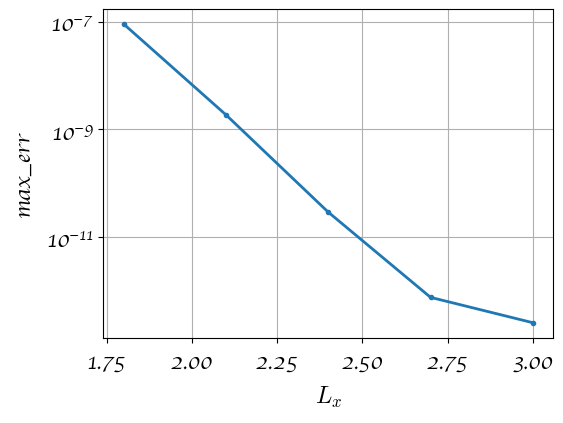

In [11]:
import matplotlib.pyplot as plt

params = {
    "figure.figsize": (6, 4.5),
    "legend.fontsize": "xx-large",
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
}
plt.rcParams.update(params)
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

r = np.arange(12, 24, 2)
max_err = np.arange(12, 24, 2, dtype=float)
for i in range(len(max_err)):
    mea = np.max(abs(A_list[i] - A_list[-1])) / abs(A_list[-1].max())
    meu = np.max(abs(U_list[i] - U_list[-1])) / abs(U_list[-1].max())
    me = max(mea, meu)
    print(f"max_err A = {mea}, max_err U = {meu} max_err = {me}")
    max_err[i] = me
plt.plot(r[:-1] * 3 / 20, max_err[:-1], ".-", lw=2)
plt.xlabel("$L_x$")
plt.ylabel("max_err")
plt.yscale("log")
plt.grid()
plt.savefig("AppFig2.pdf")
